In [3]:
import pandas as pd
import numpy as np
import random
from sklearn import datasets
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [4]:
#load the MNIST handwritten digits dataset

digits = datasets.load_digits()

In [7]:
#Assign images to "X" variable and targets to "y" variable

X, y = digits.images, digits.target

In [8]:
#testing for a sample digit

some_digit = X[5]
some_target = y[5]

Target digit: 5


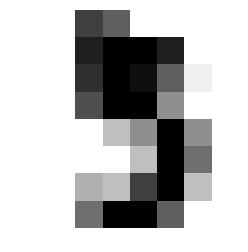

In [12]:
#plot the image

plt.imshow(some_digit, 
           cmap = matplotlib.cm.binary, 
           interpolation = "nearest")
plt.axis("off")

print("Target digit: {}".format(some_target))

plt.show()

In [14]:
print("Shape of image arrays: {}".format(X.shape))
print("Shape of target arrays: {}".format(y.shape))

Shape of image arrays: (1797, 8, 8)
Shape of target arrays: (1797,)


In [18]:
#flatten the images array using the reshape option

n_samples = len(digits.images)
images = digits.images.reshape((n_samples, -1))
print(images.shape)

(1797, 64)


In [19]:
X_train, X_test, y_train, y_test = images[:1500], images[1500:], y[:1500], y[1500:]

In [20]:
#some models are sensitive to the order of training, hence it is helpful to shuffle the training data

shuffle_index = np.random.permutation(len(X_train))
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

print(X_train.shape, y_train.shape)

(1500, 64) (1500,)


In [21]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train)

c:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [36]:
#get prediction on test data

expected = y_test
predicted = sgd_clf.predict(X_test)

In [27]:
from sklearn.metrics import classification_report

report = classification_report(expected, predicted)
print("Classification Report: \n\n{}".format(report))

Classification Report: 

             precision    recall  f1-score   support

          0       1.00      0.93      0.96        27
          1       0.72      0.94      0.82        31
          2       1.00      1.00      1.00        27
          3       0.94      0.57      0.71        30
          4       0.97      0.91      0.94        33
          5       1.00      0.87      0.93        30
          6       0.88      1.00      0.94        30
          7       0.84      0.87      0.85        30
          8       0.76      0.93      0.84        28
          9       0.77      0.77      0.77        31

avg / total       0.89      0.88      0.87       297



In [29]:
#teaching the classifier to detect only 5s

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [32]:
from sklearn.model_selection import cross_val_score, cross_val_predict

accuracy = cross_val_score(sgd_clf, 
                           X_train, 
                           y_train_5, 
                           cv = 3, 
                           scoring = "accuracy")
print("Mean accuracy of 3 CV: {}".format(round(accuracy.mean(), 3)))

y_train_pred = cross_val_predict(sgd_clf, 
                                 X_train, 
                                 y_train_5, 
                                 cv = 3)

Mean accuracy of 3 CV: 0.963


c:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\python\lib\site-packages\sklearn\linear_model\stochastic_gr

In [81]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

confusionMatrix = confusion_matrix(y_train_5, y_train_pred)
print("Confusion Matrix: \n{}\n".format(confusionMatrix))

precision = precision_score(y_train_5, y_train_pred)
print("Precision: {}\n".format(round(precision, 2)))

recall = recall_score(y_train_5, y_train_pred)
print("Recall: {}\n".format(round(recall, 2)))

f1 = f1_score(y_train_5, y_train_pred)
print("F1 scoare: {}".format(round(f1, 2)))

Confusion Matrix: 
[[1302   46]
 [   4  148]]

Precision: 0.76

Recall: 0.97

F1 scoare: 0.86
